# <u>Heart Disease Prediction System :-</u>

This project is a heart disease prediction system that preprocesses data, trains a Support Vector Machine (SVM) model, and uses a web interface for predictions. It includes data cleaning, outlier removal, model training, and serialization using pickle. A Streamlit app enables users to input patient data and receive predictions on the likelihood of heart disease.

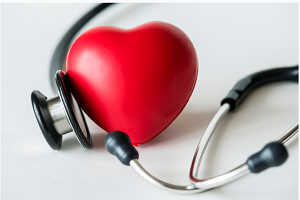

## **Import Required Libraries**

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score ,classification_report
import pickle

In [2]:
df=pd.read_csv('heart_disease_data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# **Preprocessing :-**

## Checking and Handling Missing & Duplicate values

In [5]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
df.duplicated().sum()

1

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df['target'].value_counts()

target
1    164
0    138
Name: count, dtype: int64

## **Removing Outliers from Data**

In [9]:
numerical_columns = df.select_dtypes(include=['float64','int64']).columns

def remove_outliers_IQR(original_data, numerical_columns, threshold=3):
    for col in numerical_columns:
        q1 = original_data[col].quantile(0.25)
        q3 = original_data[col].quantile(0.75)
        IQR = q3 - q1
        lower_bound = q1 - threshold * IQR
        upper_bound = q3 + threshold * IQR
        outliers_mask = (original_data[col] < lower_bound) | (original_data[col] > upper_bound)
        original_data = original_data[~outliers_mask].reset_index(drop=True)
    return original_data

# Applying the function to remove outliers
new_data = remove_outliers_IQR(df, numerical_columns)

# Displaying number of outliers removed from each numerical column
for col in numerical_columns:
    outliers_removed = len(df[col]) - len(new_data[col])
    print(f"Number of outliers removed in {col}: {outliers_removed}") 

Number of outliers removed in age: 46
Number of outliers removed in sex: 46
Number of outliers removed in cp: 46
Number of outliers removed in trestbps: 46
Number of outliers removed in chol: 46
Number of outliers removed in fbs: 46
Number of outliers removed in restecg: 46
Number of outliers removed in thalach: 46
Number of outliers removed in exang: 46
Number of outliers removed in oldpeak: 46
Number of outliers removed in slope: 46
Number of outliers removed in ca: 46
Number of outliers removed in thal: 46
Number of outliers removed in target: 46


## **Determining Features and Target**

In [10]:
x=df.drop(columns='target',axis=1)
y=df['target']

## **Performing Scaling**

In [11]:
scaler=MinMaxScaler()
x=scaler.fit_transform(x)

## **Saving the fitted scaler to a file**

In [12]:

with open('D:/MLProject/scaler.sav', 'wb') as f:
    pickle.dump(scaler, f)

## Split Data into train and Test

In [13]:
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.33,random_state=42)

## **Initilize The Model**

In [14]:
model=SVC(C=0.1)

## **Train The Model**

In [15]:
model.fit(train_x,train_y)
y_pred=model.predict(train_x)

## **Test The Model**

In [16]:
y_hat=model.predict(test_x)

## **Computing The Training and Testing Accuracy of The Model**

In [17]:
Training_Accuracy=accuracy_score(y_pred,train_y)
print("Training Accuracy",Training_Accuracy)

Testing_Accuracy=accuracy_score(y_hat,test_y)
print("Testing Accuracy",Testing_Accuracy)

Training Accuracy 0.801980198019802
Testing Accuracy 0.8


## Classification report :-

In [18]:
report=classification_report(y_hat,test_y)
print(report)

              precision    recall  f1-score   support

           0       0.79      0.76      0.77        45
           1       0.81      0.84      0.82        55

    accuracy                           0.80       100
   macro avg       0.80      0.80      0.80       100
weighted avg       0.80      0.80      0.80       100



## **Save the trained model to a file**

In [19]:
with open('D:/MLProject/trained_model.sav', 'wb') as f:
    pickle.dump(model, f)


## Load the model and scaler for prediction

In [20]:
loaded_model = pickle.load(open('D:/MLProject/trained_model.sav', 'rb'))
scaler = pickle.load(open('D:/MLProject/scaler.sav', 'rb'))


## Example input data for prediction

In [21]:
input_data = (48, 1, 0, 130, 256, 1, 0, 150, 1, 0, 2, 2, 3)
input_data_as_ndarray = np.asarray(input_data)
input_data_reshaped = input_data_as_ndarray.reshape(1, -1)

# Scale the input data
input_data_scaled = scaler.transform(input_data_reshaped)

# Predict with the loaded model
prediction = loaded_model.predict(input_data_scaled)
if prediction[0] == 0:
    print('The Person does not have heart disease')
else:
    print('The Person has heart disease')

The Person does not have heart disease


c:\Users\engyo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
